<div style="
    background-color: #1a1a1a; 
    padding: 40px; 
    border-radius: 20px; 
    text-align: center; 
    font-family: 'Garamond', serif; 
    box-shadow: 0 6px 18px rgba(0, 0, 0, 0.8); 
    color: white;">
    

<div style="
        font-size: 1.2em; 
        color: #BFA86A; 
        font-weight: bold; 
        letter-spacing: 2px;">
        ✦ A CINEMATIC EXPERIENCE ✦
</div>   

<h1 style="
        font-size: 3.2em; 
        margin: 20px 0; 
        color: #E3D9B6; 
        font-weight: bold; 
        text-transform: uppercase;">
        Money, Money, Movies
</h1>    

<h2 style="
        font-size: 2em; 
        margin: 10px 0; 
        font-style: italic; 
        color: #D4C593;">
        The Secrets of Movies' Box Office Success
</h2>

    
<div style="
        font-size: 1em; 
        color: #999; 
        margin-top: 20px;">
        🎥 A Production by <strong style="color: #E3D9B6;">C1n3mada Studios</strong>
</div>
</div>


### Importing Libraries

In [1]:
import ast
import warnings
from collections import Counter
from itertools import chain

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import clear_output
from ipywidgets import interact, widgets
from scipy import stats
from scipy.stats import f_oneway, pearsonr, spearmanr
from statsmodels.formula.api import ols
from tabulate import tabulate

from src.utils.plot_utils import revenue_formatter

warnings.filterwarnings("ignore")
%matplotlib inline
# auto-reload modules
%load_ext autoreload
%autoreload 2

In [2]:
from src.utils.interactive_plots_utils_said_movie_1 import (
    plot_num_of_movies_per_genre,
    plot_imdb_rating_distribution,
    plot_box_office_revenue_distribution,
    plot_imdb_rating_vs_box_office_revenue_v1,
    plot_imdb_rating_vs_box_office_revenue,
    plot_correlation_matrix,
    plot_genre_correlation,
    plot_3d_regression_plane,
    plot_hexbin_regression_plane,
)

### Loading the Dataset

In [3]:
# load the dataset
PATH = "data/processed/movies_processed.csv"
df = pd.read_csv(PATH)

df.head()

wiki_movie_id freebase_movie_id                movie_name  \
0         975900         /m/03vyhn            Ghosts of Mars   
1       10408933        /m/02qc0j7  Alexander's Ragtime Band   
2         171005         /m/016ywb                   Henry V   
3          77856          /m/0kcn7              Mary Poppins   
4         612710         /m/02wjqm            New Rose Hotel   

  movie_release_date  movie_box_office_revenue  movie_runtime  \
0         2001-08-24                14010832.0           98.0   
1         1938-08-16                 3600000.0          106.0   
2         1989-11-08                10161099.0          137.0   
3         1964-08-27               102272727.0          139.0   
4         1999-10-01                   21521.0           92.0   

                        movie_languages  \
0  [('/m/02h40lc', 'English Language')]   
1  [('/m/02h40lc', 'English Language')]   
2  [('/m/02h40lc', 'English Language')]   
3  [('/m/02h40lc', 'English Language')]   
4  [('/m/02h40lc', 'English Language')]   

                               movie_countries  \
0  [('/m/09c7w0', 'United States of America')]   
1  [('/m/09c7w0', 'United States of America')]   
2             [('/m/07ssc', 'United Kingdom')]   
3  [('/m/09c7w0', 'United States of America')]   
4  [('/m/09c7w0', 'United States of America')]   

                                        movie_genres  release_year  ...  \
0  [('/m/01jfsb', 'Thriller'), ('/m/06n90', 'Scie...        2001.0  ...   
1  [('/m/04t36', 'Musical'), ('/m/01z4y', 'Comedy...        1938.0  ...   
2  [('/m/04xvh5', 'Costume drama'), ('/m/082gq', ...        1989.0  ...   
3  [('/m/0hj3myq', "Children's/Family"), ('/m/04t...        1964.0  ...   
4  [('/m/01jfsb', 'Thriller'), ('/m/06n90', 'Scie...        1999.0  ...   

   combined_revenue  release_month release_day              primaryTitle  \
0        14010832.0            8.0        24.0            Ghosts of Mars   
1         3600000.0            8.0        16.0  Alexander's Ragtime Band   
2        10161099.0           11.0         8.0                   Henry V   
3       102272727.0            8.0        27.0              Mary Poppins   
4           21521.0           10.0         1.0                       NaN   

   startYear  averageRating  numVotes          director  inflated_revenue  \
0     2001.0            4.9   58868.0    John Carpenter      1.899115e+07   
1     1938.0            6.8    2357.0        Henry King      6.131466e+07   
2     1989.0            7.5   32088.0   Kenneth Branagh      1.967252e+07   
3     1964.0            7.8  189183.0  Robert Stevenson      7.913870e+08   
4        NaN            0.0       0.0           Unknown      3.100822e+04   

   inflated_budget  
0     3.795294e+07  
1     3.406370e+07  
2     1.742456e+07  
3     4.642804e+07  
4              NaN  

[5 rows x 23 columns]

# Movie 1: Echo 📢 
## How does a movie’s IMDb rating relate to its box office success?

The film industry is a complex ecosystem where various factors contribute to a movie’s success. Among these factors, audience reception and financial performance are two critical metrics. This analysis aims to explore the relationship between a movie’s IMDb rating—a reflection of audience and critic reception—and its box office revenue. Understanding this relationship can provide valuable insights for filmmakers, producers, investors as well as researchers such as ourselves.

**🏗️ Analysis Structure:**

- **Data Preparation**
  - Relevant columns
  - Handling missing values
  - Handling duplicates
  - ...
- **Exploratory Data Analysis**
  - Summary statistics
  - Number of movies per genre
  - Distribution of IMDb ratings
  - Distribution of box office revenue
  - ...
- **Regression Analysis**
  - ...
- ...

**🏗️ Analysis Structure:**

- **Data Preparation**
  - We select the `averageRating`, `inflated_revenue`, `numVotes`, and `movie_genres` columns for our analysis.
  - Missing values in these columns are removed.
  - Duplicate entries are removed.
  - The genre strings are converted into lists of individual genres.
- **Exploratory Data Analysis**
  - We compute descriptive statistics for `averageRating`, `inflated_revenue`, and `numVotes`.
  - The frequency of each genre is calculated and visualized.
  - The distribution of IMDb ratings is shown with a histogram.
  - Histograms illustrate the distribution of box office revenue, with and without log transformation.
  - A scatter plot explores the relationship between IMDb ratings and log-transformed box office revenue.
- **Correlation Analysis**
  - We determine the Pearson and Spearman correlation coefficients between IMDb rating and inflated revenue.
  - A heatmap visualizes the correlations between `averageRating`, `inflated_revenue`, and `numVotes`.
- **Genre-wise Correlation**
  - Pearson and Spearman correlations are computed for each genre, examining the relationship between ratings and log-transformed revenue.
  - These correlations are compared across genres using a horizontal bar plot.
- **Regression Analysis**
  - A simple linear regression model predicts log-transformed revenue from IMDb ratings.
  - A multiple linear regression model incorporates both IMDb rating and log-transformed number of votes to predict log-transformed revenue.
  - The multiple linear regression plane is visualized in 3D.
  - A regression plot shows the relationship between IMDb rating and log-transformed revenue, overlaid with the regression line.
  - A hexbin plot, along with a regression line, provides a clearer visualization of the relationship between rating and log-transformed revenue, handling the density of data points effectively.




**🏗️ Analysis Structure:**

- **Data Preparation**
  - Relevant columns: `averageRating`, `inflated_revenue`, `numVotes`, `movie_genres`
  - Handling missing values: Removing entries with missing values in the relevant columns.
  - Handling duplicates: Removing duplicate entries.
  - Genre processing: Converting the string representation of genres into a list of genres.
- **Exploratory Data Analysis**
  - Summary statistics: Calculating descriptive statistics for `averageRating`, `inflated_revenue`, and `numVotes`.
  - Number of movies per genre: Counting and visualizing the frequency of each genre.
  - Distribution of IMDb ratings: Visualizing the distribution using a histogram.
  - Distribution of box office revenue: Visualizing the distribution using histograms, both with and without log transformation.
  - Scatter plot: Visualizing the relationship between IMDb ratings and box office revenue (log-transformed).
- **Correlation Analysis**
  - Pearson correlation: Calculating the Pearson correlation coefficient between IMDb rating and inflated revenue.
  - Spearman correlation: Calculating the Spearman rank correlation coefficient between the same variables.
  - Correlation matrix heatmap: Visualizing the correlations between `averageRating`, `inflated_revenue`, and `numVotes`.
- **Genre-wise Correlation**
  - Calculating correlation coefficients: Computing Pearson and Spearman correlations between rating and log-transformed revenue for each genre.
  - Visualizing correlations: Using a horizontal bar plot to compare Pearson and Spearman correlations for each genre.
- **Regression Analysis**
  - Simple linear regression: Modeling the relationship between IMDb rating and log-transformed revenue.
  - Multiple linear regression: Modeling the relationship between IMDb rating, log-transformed number of votes, and log-transformed revenue.
  - 3D visualization: Visualizing the multiple linear regression plane.
  - Regression plot: Visualizing the regression line against the scatter plot of IMDb rating and log-transformed revenue.
  - Hexbin plot: Creating a hexbin plot with a regression line to better visualize the relationship between rating and log-transformed revenue.



**🏗️ Analysis Structure:**

- **Data Preparation**
  - **Columns:** We use `averageRating`, `inflated_revenue`, `numVotes`, and `movie_genres`.
  - **Missing Data:** Entries with missing values are removed.
  - **Duplicates:** Duplicate entries are removed.
  - **Genres:** Genre strings are converted to lists.
- **Exploratory Data Analysis (EDA)**
  - **Descriptive Statistics:** We examine the distributions of ratings, revenue, and votes.
  - **Genre Counts:** We analyze and visualize the frequency of each genre.
  - **Rating Distribution:** A histogram displays the distribution of IMDb ratings.
  - **Revenue Distribution:**  Histograms show revenue distribution, both raw and log-transformed.
  - **Ratings vs. Revenue:** A scatter plot explores the relationship between IMDb ratings and log-transformed revenue.
- **Correlation Analysis**
  - **Pearson & Spearman:** We compute both correlation coefficients between ratings and revenue.
  - **Correlation Matrix:** A heatmap visualizes the relationships between ratings, revenue, and votes.
- **Genre-Specific Correlations**
  - **By Genre:** We compute Pearson and Spearman correlations for each genre (ratings vs. log-transformed revenue).
  - **Visual Comparison:** A bar plot compares correlations across genres.
- **Regression Analysis**
  - **Simple Regression:** We model log-transformed revenue as a function of IMDb ratings.
  - **Multiple Regression:** We add log-transformed vote counts to the regression model.
  - **3D Visualization:** We visualize the multiple regression plane.
  - **Regression Plot:** We visualize the regression line against the data.
  - **Hexbin Plot:** A hexbin plot with regression line provides a clearer view of the relationship, handling data density effectively.

### Data Preparation

#### Relevant Columns
For this analysis, we’ll focus on the following columns:
*	`averageRating`: The IMDb rating of the movie.
*	`inflated_revenue`: The box office revenue adjusted for inflation.
*	`numVotes`: The number of votes the movie received on IMDb.
*   `movie_genres`: The genres of the movie.

In [4]:
# Select relevant columns
df_rating = df[
    ["movie_name", "averageRating", "inflated_revenue", "numVotes", "movie_genres"]
]

#### Handling Missing Values
We’ll check and remove the rows that contains no votes or revenue information.

In [5]:
# Drop rows with missing values or zero numVotes
df_rating.dropna(
    subset=["averageRating", "inflated_revenue", "numVotes"],
    inplace=True,
)
df_rating = df_rating[df_rating.numVotes > 0]

#### Handling Duplicates

In [6]:
# Check for duplicates
df_rating.duplicated().sum()

# remove duplicates if any
df_rating.drop_duplicates(inplace=True)

In [7]:
# Split genres into a list of genres names
df_rating["genres_list"] = df_rating["movie_genres"].apply(
    lambda x: [genre[1] for genre in eval(x)]
)

### Exploratory Data Analysis

<div class="alert alert-success"> 💭 <strong>Idea:</strong> 

- Understand the distribution of IMDb ratings. 
- Analyze the distribution of box office revenue. 
- Explore the relationship between IMDb ratings and box office revenue. 
- Investigate the number of movies per genre. 
</div> <div class="alert alert-warning"> 🛠️ <strong>Methods:</strong>

 - Use descriptive statistics to summarize the data. 
 - Visualize the distribution of IMDb ratings using histograms. 
 - Visualize the distribution of box office revenue using histograms with a logarithmic scale. 
 - Use bar plots to show the number of movies per genre. 
 - Use scatter plots to explore the relationship between IMDb ratings and box office revenue. </div>

#### Summary Statistics

In [8]:
df_rating.describe()

averageRating  inflated_revenue      numVotes
count    7892.000000      7.892000e+03  7.892000e+03
mean        6.429726      8.712150e+07  7.893043e+04
std         0.969148      2.189459e+08  1.778774e+05
min         1.600000      1.108173e+03  7.400000e+01
25%         5.900000      7.114762e+06  5.778750e+03
50%         6.500000      2.571579e+07  2.028500e+04
75%         7.100000      8.179225e+07  7.315275e+04
max         9.300000      6.941575e+09  2.959489e+06

#### Number of Movies per Genre

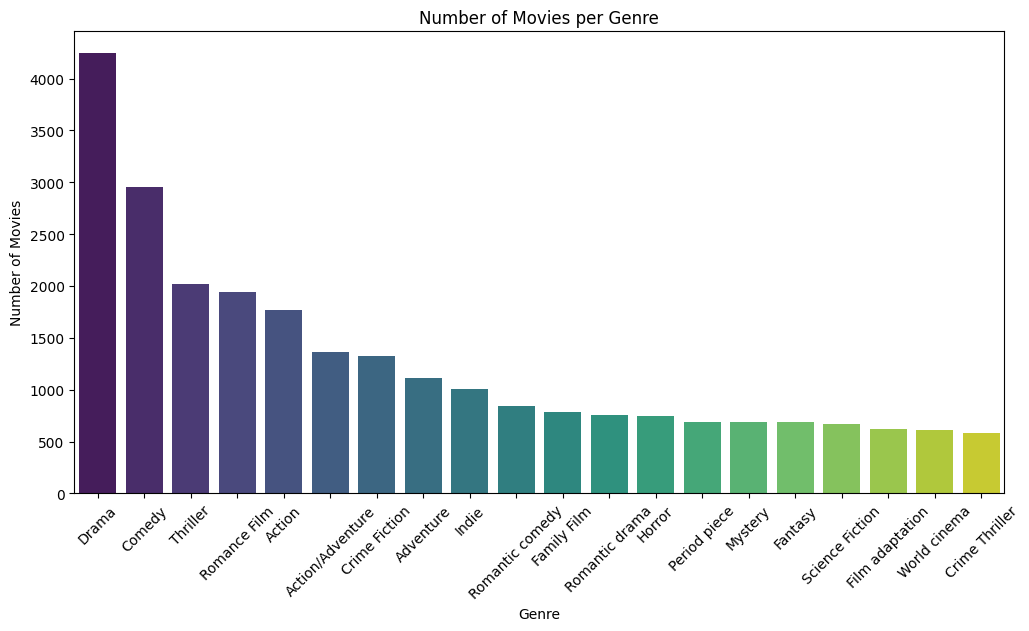

In [9]:
# Explode the genres_list to count each genre separately
genre_counts = df_rating.explode("genres_list")["genres_list"].value_counts()

# get the most common 20 genres
genre_counts_top20 = genre_counts.head(20)


plt.figure(figsize=(12, 6))
sns.barplot(
    x=genre_counts_top20.index,
    y=genre_counts_top20.values,
    palette="viridis",
    hue=genre_counts_top20.index,
)
plt.title("Number of Movies per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

In [11]:
plot_num_of_movies_per_genre(df_rating)

#### Distribution of IMDb Ratings

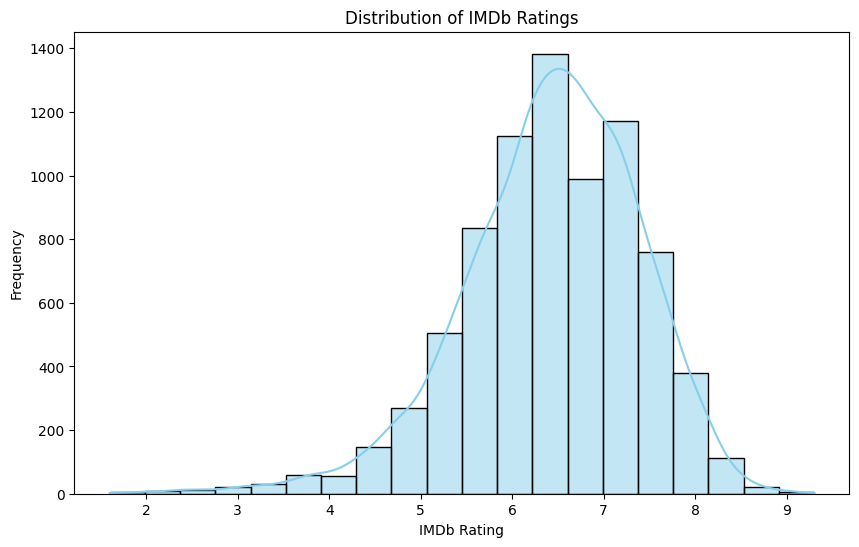

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df_rating["averageRating"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Frequency")
plt.show()

In [21]:
plot_imdb_rating_distribution(df_rating)

#### Distribution of Box Office Revenue
Due to the wide range of revenues, we’ll use a logarithmic scale.

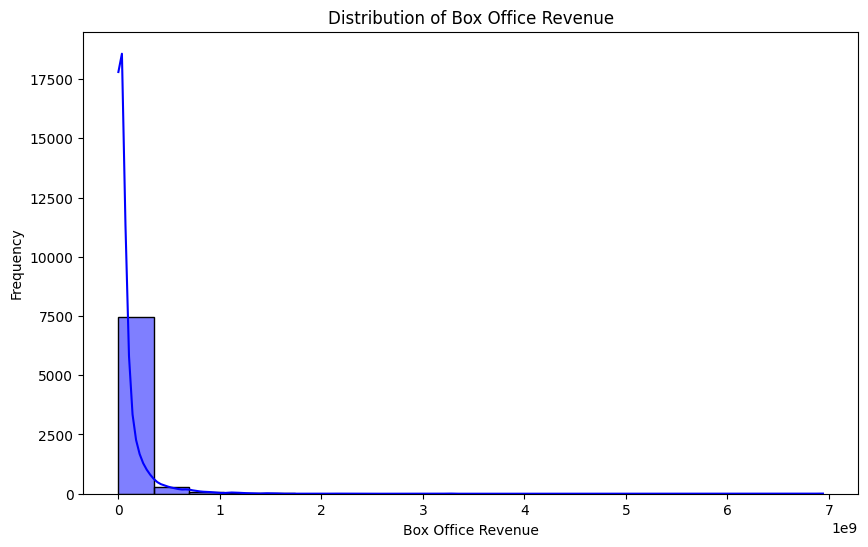

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df_rating["inflated_revenue"], bins=20, kde=True, color="blue")
plt.title("Distribution of Box Office Revenue")
plt.xlabel("Box Office Revenue")
plt.ylabel("Frequency")
plt.show()

<div class="alert alert-info">
  💡 <strong>Discussion:</strong>

  - For our analysis, we log-transformed the movie revenue data (using log base 10) for several reasons:
    - **Distribution Properties**: As we can see from the Distribution of the Box Office Revenue plot above, movie revenues show a right-skewed distribution with a long tail of high-revenue outliers. Log transformation helps normalize this distribution.
    - **Statistical Considerations**: The transformation helps meet OLS regression assumptions by:
      - Making the relationship more linear
      - Normalizing the distribution of errors

</div>

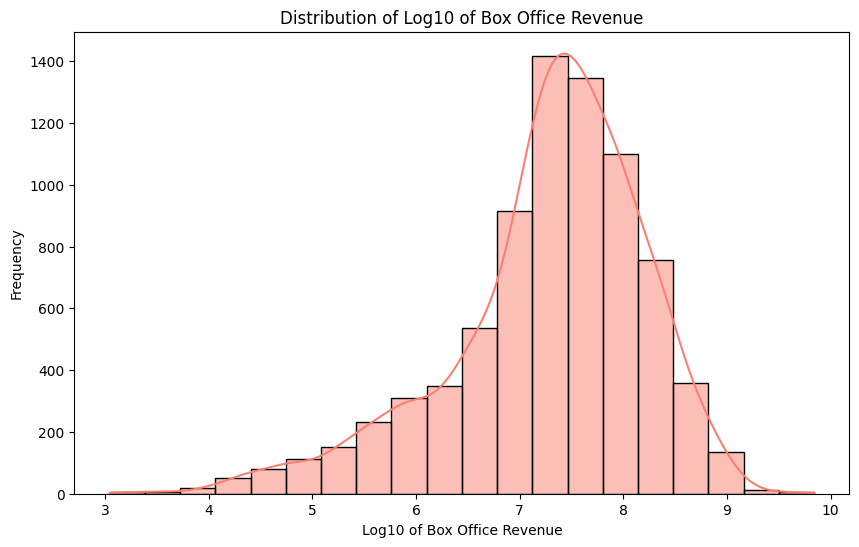

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log10(df_rating["inflated_revenue"]), bins=20, kde=True, color="salmon")
plt.title("Distribution of Log10 of Box Office Revenue")
plt.xlabel("Log10 of Box Office Revenue")
plt.ylabel("Frequency")
plt.show()

In [26]:
plot_box_office_revenue_distribution(df_rating)

<div class="alert alert-info">
  💡 <strong>Discussion:</strong>

  - As shown in the plots above, the log transformation provides a more normally distributed dependent variable.

</div>

#### Scatter Plot of IMDb Ratings vs. Box Office Revenue

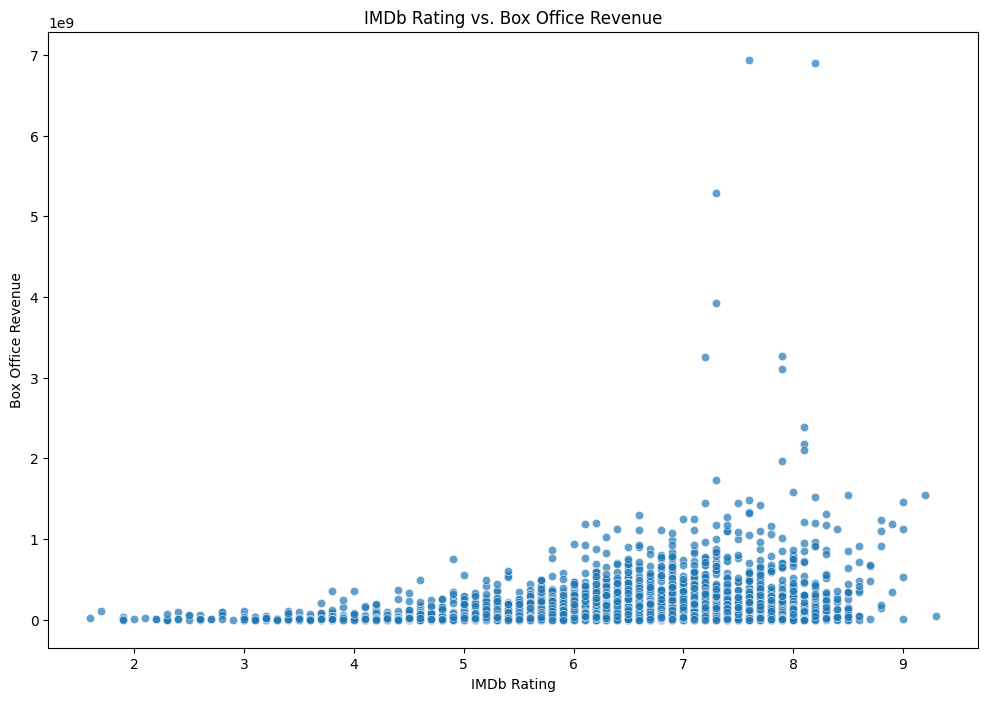

In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="averageRating", y="inflated_revenue", data=df_rating, alpha=0.7)
plt.title("IMDb Rating vs. Box Office Revenue")
plt.xlabel("IMDb Rating")
plt.ylabel("Box Office Revenue")
plt.show()

<div class="alert alert-info">
  💡 <strong>Discussion:</strong>

  - The scatter plot shows a lot of dispersion. To better visualize the data, we’ll apply a logarithmic transformation to the revenue.

</div>

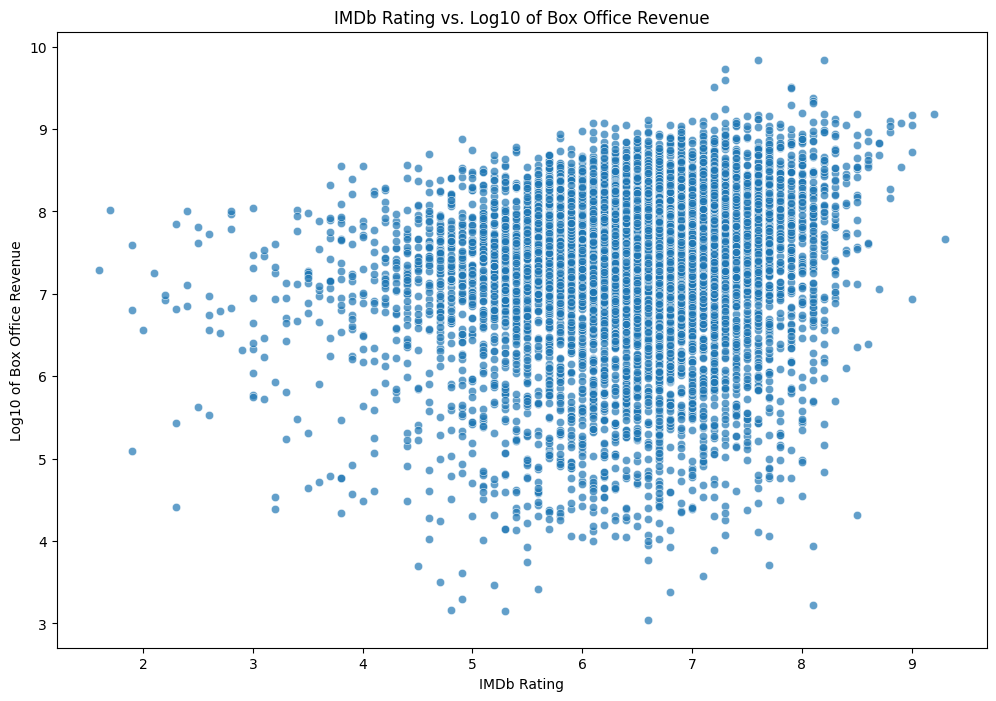

In [28]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="averageRating",
    y=np.log10(df_rating["inflated_revenue"]),
    data=df_rating,
    alpha=0.7,
)
plt.title("IMDb Rating vs. Log10 of Box Office Revenue")
plt.xlabel("IMDb Rating")
plt.ylabel("Log10 of Box Office Revenue")
plt.show()

In [29]:
plot_imdb_rating_vs_box_office_revenue_v1(df_rating)

In [35]:
plot_imdb_rating_vs_box_office_revenue(df_rating)

### Correlation Analysis


Correlation analysis helps in understanding the strength and direction of the relationship between two variables. In this section, we will analyze the correlation between IMDb ratings and box office revenue.

<div class="alert alert-success"> 💭 <strong>Idea:</strong> 

- Determine the strength and direction of the relationship between IMDb ratings and box office revenue. 
- Identify if higher ratings are associated with higher revenues. 
</div> 

<div class="alert alert-warning"> 🛠️ <strong>Methods:</strong> 

- Calculate the Pearson and spearman correlation coefficient between IMDb ratings and box office revenue. 
- Visualize the correlation using a heatmap. 
</div>

#### Calculating the Correlation Coefficient

In [36]:
# Pearson correlation
corr_pearson = df_rating[["averageRating", "inflated_revenue"]].corr(method="pearson")
print("Pearson Correlation Coefficient:")
print(corr_pearson)

# Spearman correlation
corr_spearman = df_rating[["averageRating", "inflated_revenue"]].corr(method="spearman")
print("\nSpearman Correlation Coefficient:")
print(corr_spearman)

Pearson Correlation Coefficient:
                  averageRating  inflated_revenue
averageRating          1.000000          0.180228
inflated_revenue       0.180228          1.000000

Spearman Correlation Coefficient:
                  averageRating  inflated_revenue
averageRating          1.000000          0.157229
inflated_revenue       0.157229          1.000000


#### Heatmap of Correlation Matrix

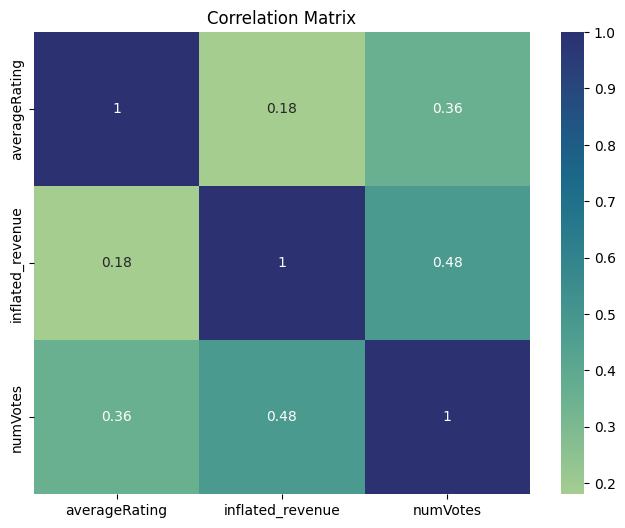

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df_rating[["averageRating", "inflated_revenue", "numVotes"]].corr(),
    annot=True,
    cmap="crest",
)
plt.title("Correlation Matrix")
plt.show()

In [75]:
plot_correlation_matrix(df_rating)

<div class="alert alert-info">
  💡 <strong>Discussion:</strong>

  - The Pearson correlation coefficient between IMDb rating and inflated revenue is 0.188, indicating a weak positive linear relationship.
  - The Spearman correlation coefficient is 0.157, suggests a weak monotonic relationship.

</div>

### Genre-wise Correlation

<div class="alert alert-success"> 💭 <strong>Idea:</strong> 

Different genres might exhibit different relationships between ratings and revenue. As for different genres audiences might have different biases in rating movies. For instance, horror movies might get lower ratings due to the affects they have on the audience, but they might still be successful in terms of revenue.
</div> 

#### Function to Calculate Correlations by Genre

In [45]:
def genre_correlation(genre):
    genre_data = df_rating[df_rating["genres_list"].apply(lambda x: genre in x)]
    pearson_corr, _ = pearsonr(
        genre_data["averageRating"], np.log10(genre_data["inflated_revenue"])
    )
    spearman_corr, _ = spearmanr(
        genre_data["averageRating"], np.log10(genre_data["inflated_revenue"])
    )
    return pd.Series(
        {"Genre": genre, "Pearson": pearson_corr, "Spearman": spearman_corr}
    )

#### Calculate Correlations by Genre

In [46]:
# get top 20 genres
genre_counts_filtered = genre_counts.head(20)
genres = genre_counts_filtered.index.tolist()
genre_corrs = pd.DataFrame([genre_correlation(genre) for genre in genres])
genre_corrs.set_index("Genre", inplace=True)
genre_corrs

Pearson  Spearman
Genre                               
Drama             0.230902  0.230783
Comedy            0.186471  0.185382
Thriller          0.230736  0.248662
Romance Film      0.183884  0.176662
Action            0.304330  0.323150
Action/Adventure  0.299375  0.302421
Crime Fiction     0.208187  0.228940
Adventure         0.277862  0.310489
Indie             0.237353  0.251666
Romantic comedy   0.229253  0.212764
Family Film       0.255518  0.297464
Romantic drama    0.184314  0.177087
Horror            0.242278  0.229773
Period piece      0.376940  0.412148
Mystery           0.247740  0.267792
Fantasy           0.255571  0.269186
Science Fiction   0.296879  0.298583
Film adaptation   0.400542  0.408783
World cinema      0.062458  0.066823
Crime Thriller    0.308922  0.302500

#### Visualizing Genre-wise Correlations

In [76]:
plot_genre_correlation(genre_corrs)

<div class="alert alert-info">
  💡 <strong>Discussion:</strong>

  - Among the genres, some exhibit a stronger correlation between IMDb rating and box office revenue than others.
  - For example, Action movies have a positive correlation of 0.33, while World cinema movies have a near negligible correlation of 0.05.
  - Although the correlation values vary across genres, there is no genre with a negative correlation or a very strong positive correlation between IMDb rating and box office revenue.

</div>

### Regression Analysis

<div class="alert alert-success"> 💭 <strong>Idea:</strong>

 - We build a regression model to predict box office revenue based on IMDb ratings. 
 - The predictive power of IMDb ratings can be assessed on box office revenue. 
 </div> 
 <div class="alert alert-warning"> 🛠️ <strong>Methods:</strong> 
 
 - Use linear regression to model the relationship between IMDb ratings and box office revenue.
  - Evaluate the model's performance using metrics such as R-squared and P values. 
  - Visualize the regression line and residuals. 
  </div>

#### Linear Regression Model

##### Simple Linear Regression

In [49]:
# Prepare the df_rating
X = df_rating[["averageRating"]]
y = np.log10(df_rating["inflated_revenue"])  # Log-transform the revenue

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       inflated_revenue   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     202.6
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           2.06e-45
Time:                        10:48:18   Log-Likelihood:                -10716.
No. Observations:                7892   AIC:                         2.144e+04
Df Residuals:                    7890   BIC:                         2.145e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.2724      0.071     88.268

##### Multiple Linear Regression: IMDb Rating and Number of Votes vs. Box Office Revenue

In [50]:
# Prepare the df_rating
X_multi = df_rating[["averageRating", "numVotes"]]
y_multi = np.log10(df_rating["inflated_revenue"])

# Log-transform numVotes to normalize
X_multi["log_numVotes"] = np.log10(X_multi["numVotes"])

# Add a constant term
X_multi = sm.add_constant(X_multi[["averageRating", "log_numVotes"]])

# Fit the model
model_multi = sm.OLS(y_multi, X_multi).fit()

# Model summary
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:       inflated_revenue   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     1986.
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:48:19   Log-Likelihood:                -9206.8
No. Observations:                7892   AIC:                         1.842e+04
Df Residuals:                    7889   BIC:                         1.844e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3839      0.066     65.974

<div class="alert alert-info">
  💡 <strong>Discussion:</strong>

  - **Model Improvement:** Including log-transformed vote count significantly enhanced the model, with R² rising from 0.021 (rating-only) to 0.283, which shows vote count as a stronger revenue predictor than ratings alone.
  - **Surprising Rating Effect Shift:** Controlling for votes, the rating coefficient turns slightly negative (-0.0550) compared to its positive effect (0.1663) in the single predictor model. This indicates that higher ratings don’t necessarily increase revenue once popularity (votes) is considered. (Said's Note: This is a surprising result that may effect our other analysis in this section as well)
  - **Vote Count Impact**: The positive coefficient for log_numVotes (0.7979, p < 0.001) suggests a 10% vote count increase correlates with an 8% revenue boost, that highlights vote count as the primary revenue driver over rating quality.

</div>

#### 3D Visualization of Multiple Linear Regression Model

In [51]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [53]:
plt.style.use("seaborn-v0_8-whitegrid")

# Create a meshgrid for plotting
averageRating_range = np.linspace(
    df_rating["averageRating"].min(), df_rating["averageRating"].max(), 50
)
log_numVotes_range = np.linspace(
    np.log10(df_rating["numVotes"]).min(), np.log10(df_rating["numVotes"]).max(), 50
)
averageRating_grid, log_numVotes_grid = np.meshgrid(
    averageRating_range, log_numVotes_range
)
predicted_revenue = model_multi.predict(
    sm.add_constant(
        pd.DataFrame(
            {
                "averageRating": averageRating_grid.ravel(),
                "log_numVotes": log_numVotes_grid.ravel(),
            }
        )
    )
).values.reshape(averageRating_grid.shape)

# Plotting
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    df_rating["averageRating"],
    np.log10(df_rating["numVotes"]),
    np.log10(df_rating["inflated_revenue"]),
    c="blue",
    alpha=0.5,
    label="Actual Data",
)
ax.plot_surface(
    averageRating_grid,
    log_numVotes_grid,
    predicted_revenue,
    color="red",
    alpha=0.4,
    label="Regression Plane",
)
ax.set_xlabel("IMDb Rating")
ax.set_ylabel("Log10 of NumVotes")
ax.set_zlabel("Log10 of Inflated Revenue")
# fit z label inside the plot
ax.zaxis.labelpad = -10

plt.title("3D Regression Plane")
plt.legend()
plt.show()

AttributeError: module 'matplotlib.cbook' has no attribute '_broadcast_with_masks'

In [73]:
plot_3d_regression_plane(df_rating, model_multi)

#### Regression Plot

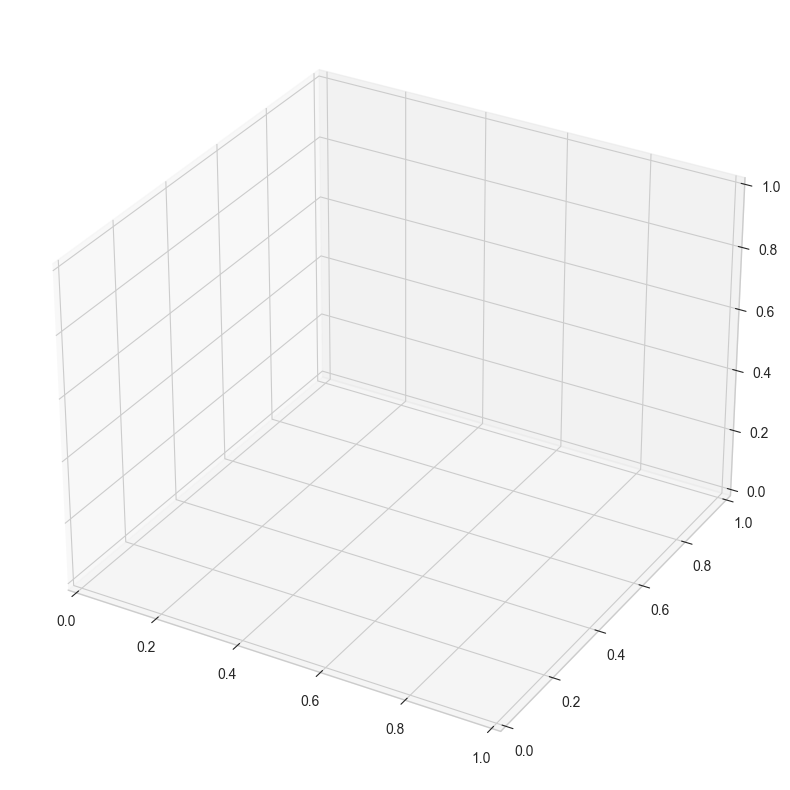

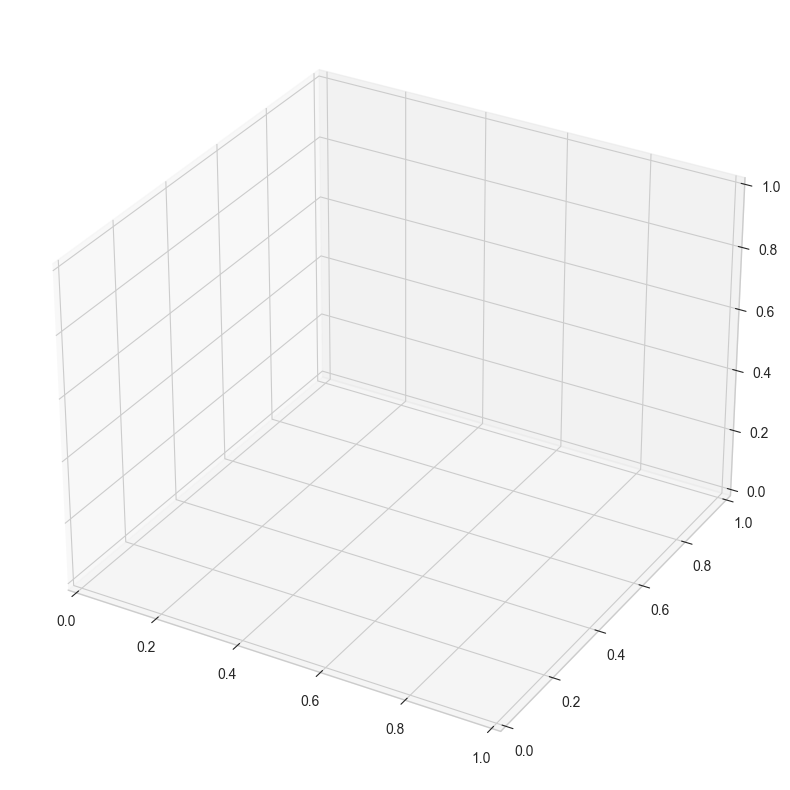

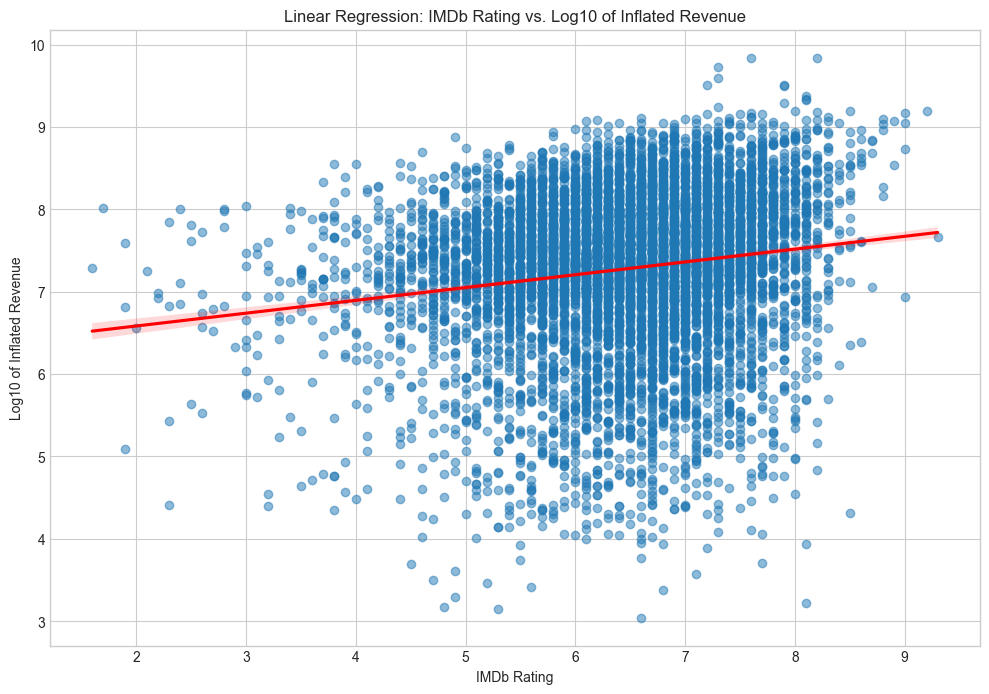

In [56]:
# TODO Said's Note: Since scatter plot is not a good choice to visualize the regression line for this task (as there are thousands of points), we may omit this plot (as the next plot is more informative with hexbins)
plt.figure(figsize=(12, 8))
sns.regplot(
    x="averageRating",
    y=np.log10(df_rating["inflated_revenue"]),
    data=df_rating,
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"},
)
plt.title("Linear Regression: IMDb Rating vs. Log10 of Inflated Revenue")
plt.xlabel("IMDb Rating")
plt.ylabel("Log10 of Inflated Revenue")
plt.show()

It is hard to interpret the regression scatter plot due to the high density of points. We can use a hexbin plot to visualize the relationship better.

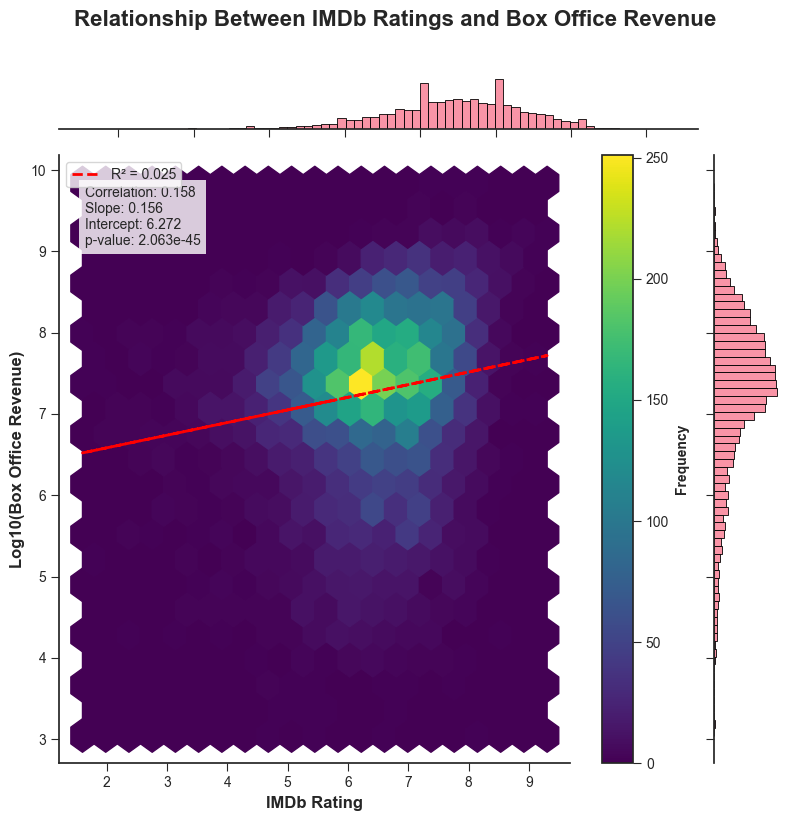

In [57]:
# Create figure with custom size and style
plt.style.use("seaborn-v0_8-ticks")
sns.set_palette("husl")

# Creation of the joint plot
g = sns.jointplot(
    data=df_rating,
    x="averageRating",
    y=np.log10(df_rating["inflated_revenue"]),
    kind="hex",
    height=8,  # figure size
    ratio=8,  # the ratio of main plot to marginal plots
    marginal_kws=dict(bins=70),  # More bins in marginal plots
    joint_kws=dict(gridsize=20),  # More hexbins for better resolution
    palette="viridis",  # Modern color palette
)

# Add trend line
x = df_rating["averageRating"]
y = np.log10(df_rating["inflated_revenue"])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
g.ax_joint.plot(
    x, line, color="red", linestyle="--", linewidth=2, label=f"R² = {r_value**2:.3f}"
)

# Customize the plot
g.figure.suptitle(
    "Relationship Between IMDb Ratings and Box Office Revenue",
    y=1.02,
    fontsize=16,
    fontweight="bold",
)

# Add descriptive labels
g.ax_joint.set_xlabel("IMDb Rating", fontsize=12, fontweight="bold")
g.ax_joint.set_ylabel("Log10(Box Office Revenue)", fontsize=12, fontweight="bold")

# Add legend with modern color
g.ax_joint.legend(loc="upper left", fontsize=10, frameon=True, facecolor="white")


# Add text box with statistics
stats_text = (
    f"Correlation: {r_value:.3f}\n"
    f"Slope: {slope:.3f}\n"
    f"Intercept: {intercept:.3f}\n"
    f"p-value: {p_value:.3e}"
)
g.ax_joint.text(
    0.05,
    0.95,
    stats_text,
    transform=g.ax_joint.transAxes,
    bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"),
    fontsize=10,
    verticalalignment="top",
)

# Customize hexbin appearance
g.ax_joint.collections[0].set_cmap("viridis")  # Modern colormap


# Add color bar
cbar = g.figure.colorbar(g.ax_joint.collections[0], ax=g.ax_joint, label="Count")
cbar.set_label("Frequency", fontsize=10, fontweight="bold")

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()

In [58]:
import plotly.graph_objects as go
import numpy as np
from scipy import stats

# Pre-calculate log revenue
df_rating["log_revenue"] = np.log10(df_rating["inflated_revenue"])

# Calculate the trendline (do this once, outside the figure creation)
x = df_rating["averageRating"]
y = df_rating["log_revenue"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept


# Create the hexbin plot
hexbin_trace = go.Histogram2dContour(
    x=df_rating["averageRating"],
    y=df_rating["log_revenue"],
    colorscale="Viridis",  # Choose a suitable colorscale
    nbinsx=30,  # Number of bins in x direction
    nbinsy=30,  # Number of bins in y direction
    showscale=True,  # Show colorbar
    colorbar=dict(
        title="Number of Movies", len=0.5, y=0.5
    ),  # shorter colorbar, middle placement
    hovertemplate="IMDb Rating: %{x:.2f}<br>Log Revenue: %{y:.2f}<br>Count: %{z}",
)

# Create the trendline trace
trendline_trace = go.Scatter(
    x=x,
    y=line,
    mode="lines",
    line=dict(color="red", width=2, dash="dash"),
    name=f"Trendline (R² = {r_value**2:.3f})",
)

# Create the marginal distributions (histograms)
x_hist = go.Histogram(
    x=df_rating["averageRating"],
    marker_color="#f47835",  # some color
    opacity=0.75,
    name="IMDb Rating Distribution",
    yaxis="y2",  # use secondary axis
    showlegend=False,
)
y_hist = go.Histogram(
    y=df_rating["log_revenue"],
    marker_color="#f47835",
    opacity=0.75,
    name="Log Revenue Distribution",
    xaxis="x2",
    showlegend=False,
)


# Create the layout
layout = go.Layout(
    title_text="Relationship Between IMDb Ratings and Box Office Revenue",
    xaxis_title="IMDb Rating",
    yaxis_title="Log10(Box Office Revenue)",
    plot_bgcolor="white",
    paper_bgcolor="white",
    font_color="black",
    xaxis=dict(domain=[0, 0.85], showgrid=False),  # xaxis range for the main plot
    yaxis=dict(
        domain=[0, 0.85], showgrid=True, gridcolor="lightgray"
    ),  # yaxis range for the main plot
    xaxis2=dict(domain=[0.85, 1], showgrid=False),  # for y marginal distribution
    yaxis2=dict(domain=[0.85, 1], showgrid=False),  # for x marginal distribution
    margin=dict(t=50, b=0, l=0, r=0),  # Adjust margins to avoid overlapping labels
    legend=dict(font=dict(size=12), orientation="h", y=1, x=0.75),
    annotations=[
        dict(
            x=0.03,
            y=0.93,
            xref="paper",
            yref="paper",
            text=(
                f"Correlation: {r_value:.3f}<br>"
                f"Slope: {slope:.3f}<br>"
                f"Intercept: {intercept:.3f}<br>"
                f"p-value: {p_value:.3e}"
            ),
            showarrow=False,
            bgcolor="white",
            bordercolor="black",
            borderwidth=1,
            font=dict(size=12),
            align="left",
        ),
    ],
    barmode="overlay",  # Important: Overlay bar charts for histograms
    bargap=0,
)

fig = go.Figure(data=[hexbin_trace, trendline_trace, x_hist, y_hist], layout=layout)

fig.show()

In [74]:
plot_hexbin_regression_plane(df_rating)

In [60]:
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import linregress
import numpy as np

# Prepare data
x = df_rating["averageRating"]
y = np.log10(df_rating["inflated_revenue"])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
trendline = slope * x + intercept

# Hexbin plot
fig = px.density_heatmap(
    x=x,
    y=y,
    nbinsx=100,  # Number of bins in x-direction
    nbinsy=100,  # Number of bins in y-direction
    color_continuous_scale="Viridis",  # Color-blind friendly palette
    labels={
        "x": "IMDb Rating",
        "y": "Log10(Box Office Revenue)",
        "color": "Frequency",
    },
    title="Relationship Between IMDb Ratings and Box Office Revenue",
)

# Add regression line
fig.add_trace(
    go.Scatter(
        x=x,
        y=trendline,
        mode="lines",
        line=dict(color="red", dash="dash", width=2),
        name=f"Trend Line (R² = {r_value**2:.3f})",
        hoverinfo="skip",  # Skip hover on the line
    )
)

# Add text box with regression statistics
fig.add_annotation(
    x=0.95,  # Position near top-right
    y=0.95,
    xref="paper",
    yref="paper",
    text=(
        f"<b>Regression Stats:</b><br>"
        f"Correlation: {r_value:.3f}<br>"
        f"Slope: {slope:.3f}<br>"
        f"Intercept: {intercept:.3f}<br>"
        f"P-value: {p_value:.3e}"
    ),
    showarrow=False,
    font=dict(size=12),
    align="left",
    bordercolor="black",
    borderwidth=1,
    borderpad=8,
    bgcolor="white",
    opacity=0.8,
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="IMDb Rating",
    yaxis_title="Log10(Box Office Revenue)",
    title=dict(
        text="Relationship Between IMDb Ratings and Box Office Revenue",
        x=0.5,
        font=dict(size=18, family="Arial"),
    ),
    coloraxis_colorbar=dict(title="Frequency"),
    template="plotly_white",
)

# Show plot
fig.show()

<div class="alert alert-info"> 📢 <strong>Discussion:</strong> 

- The regression analysis provides a quantitative measure of the relationship between IMDb ratings and box office revenue.
- The visualization, including the regression line and hexbin plot, helps in understanding the distribution of data points and the fit of the regression model. 
- The color bar provides additional context by showing the frequency of data points in different regions of the plot.
- The slope of the regression line shows the rate at which box office revenue changes with respect to IMDb ratings. And since the slope is not significant, we can say that the relationship is weak.
- The p-value indicates the statistical significance of the relationship, with a low p-value suggesting that the observed relationship is unlikely to be due to chance. 
 </div>